## Good Evening all,

### Today i am going to discuss EDA on lung capacity dataset.
### It comprises of the following steps:
    Importing the dataset(LungCap) into python environment.
    Understanding the structure of dataset.
    Graphical exploration of dataset.
    Descriptive statstics about the dataset.
    Insights from the dataset.
    
    


In [6]:
import pandas as pd                    #for data preprocessing
import numpy as np                     #for linear algebra
import matplotlib.pyplot as plt        #for plotting visualisations
from pandas import DataFrame,Series
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [7]:
lung = pd.read_excel("C:\\Users\\SAIRAM YERRAMSETTI\\Documents\\data sets\\lung-capacity\\LungCap.xls")
# lungcap = pd.read_csv(r"C:\\Users\\SAIRAM YERRAMSETTI\\Desktop\\LungCapData.txt", sep= "\t")

Handling categorical variables in Python


In [8]:
lung.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [9]:
lung.tail()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no
724,7.100,10,67.7,no,male,no


In [10]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     725 non-null    float64
 1   Age( years)     725 non-null    int64  
 2   Height(inches)  725 non-null    float64
 3   Smoke           725 non-null    object 
 4   Gender          725 non-null    object 
 5   Caesarean       725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


## Here's the meaning of variables:

    1.LungCap: It's the lung capacity (closing capacity) of the person.
    2.Age    : It's how old is the person.
    3.Height : It's how tall is the person.
    4.Smoke  : If the person smokes or doesn't smoke.
    5.Gender : It's says about the gender of the person i.e male or female.
    6.Caesarean : If they're born by caesarean.

## Graphical Representation:

In this data file i have 6 variables. this data is showing lungs capacity of smokers and non-smokers by age, gender and height.

In [11]:
lung['Gender'].value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [12]:
#percentage ratio's between male and female
lung['Gender'].value_counts(normalize=True)

male      0.506207
female    0.493793
Name: Gender, dtype: float64

since we have more men than women from the dataset.

## Univariate Analysis

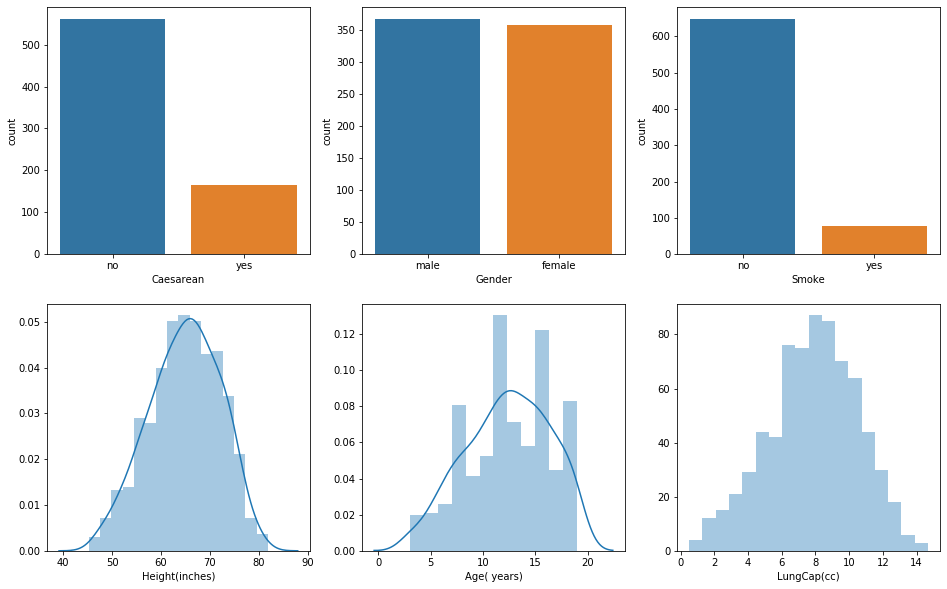

In [13]:
fig, axes = plt.subplots(2, 3, figsize= (16, 10))
sns.countplot('Caesarean',data=lung,ax = axes[0,0])
sns.countplot('Gender',data =lung, ax = axes[0,1])
sns.countplot('Smoke',data = lung, ax = axes[0,2])
sns.distplot(lung['Height(inches)'], ax = axes[1,0])
sns.distplot(lung['Age( years)'], ax = axes[1,1])
sns.distplot(lung['LungCap(cc)'],kde= False,ax = axes[1,2])

In the above subplots, count or records(in num) of each variable was shown.
Now i am going to make pie charts which can summarize the distribution of categorical variables.

### Pie-Charts

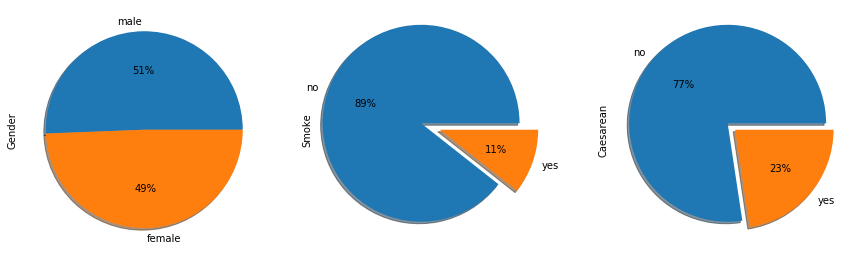

In [14]:
fig, axes = plt.subplots(1, 3 , figsize=(15,5))
lung['Gender'].value_counts().plot.pie(explode = [0,0], autopct = '%1.0f%%', ax = axes[0], shadow = True)
lung['Smoke'].value_counts().plot.pie(explode = [0.2,0], autopct = '%1.0f%%', ax = axes[1], shadow = True)
lung['Caesarean'].value_counts().plot.pie(explode = [0.1,0], autopct = '%1.0f%%', ax = axes[2], shadow = True)
plt.show()

Above figure shows the percentage of each categorical variable. We can say that men are more than women, Smokers are less when compared to Non-smokers and people who born by Caesarean are less when compared with people not born by Caesarean.

## Bivariate Analysis

#### Gender vs Age

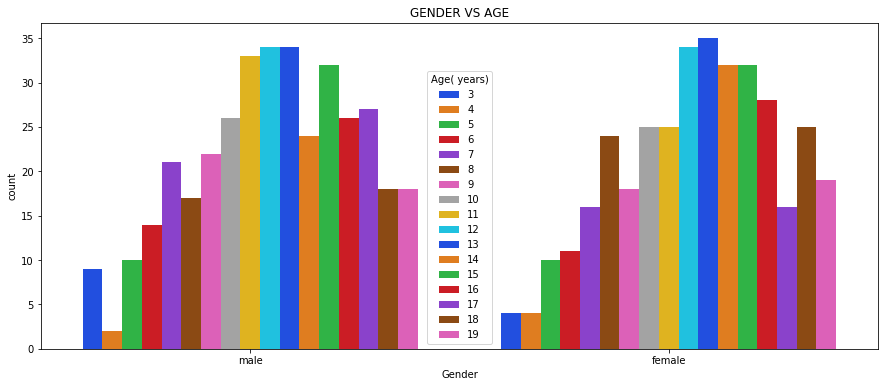

In [15]:
fig = plt.figure(figsize = (15,6))
sns.countplot(x='Gender',data = lung, hue='Age( years)', palette = 'bright' )
plt.title('GENDER VS AGE')
plt.show()

In the above figure, it was clearly shown in the given dataset, that the male having age 12 & 13 are more and age of 4 are less.

#### Age vs Caesarean, Lung Capacity vs Gender

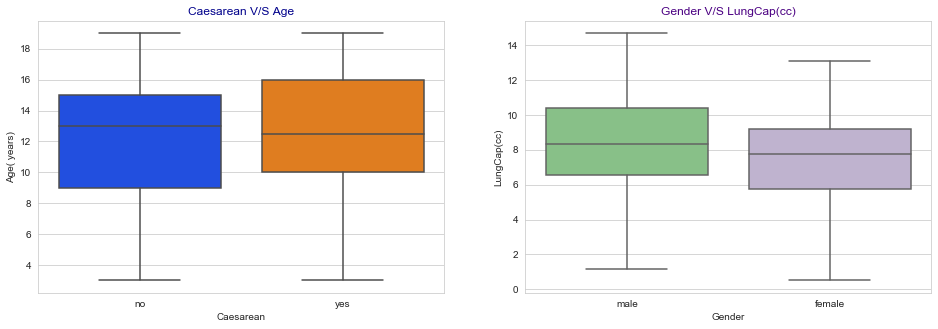

In [18]:
fig, axes = plt.subplots(1,2, figsize= (16,5))
sns.set_style("whitegrid")
sns.boxplot(y = 'Age( years)',data = lung, x = 'Caesarean', palette = 'bright', dodge = True, ax = axes[0])
axes[0].set_title('Caesarean V/S Age', color = 'darkblue')
sns.boxplot(y = 'LungCap(cc)',data = lung, x = 'Gender', palette = 'Accent', ax = axes[1])
axes[1].set_title('Gender V/S LungCap(cc)', color = 'indigo')

# medians = lung.groupby(['Caesarean'])['Age(years)'].median()
# vertical_offset = lung['Age(years)'].median() * 0.05 # offset from median for display

# for xtick in box_plot[0].get_xticks():
#     box_plot[0].text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.show()

Box plot is a nice way of viewing some statical values along with relationship between two values.

In the first plot, the median of age of people not born by Caesarean is 13yrs and born by Caesarean is 12yrs. The interquantile range of people's age not born by Caesarean is about 6yrs and born by Caesarean is also 6 yrs. The part of the box to the top of the median (representing the age above 13yrs) is shorter than the part to the bottom of the median (representing the young age below 13yrs) for people not born by Caesarean. The part of the box to the top of the median (representing the age above 12yrs) is bigger than the part to the bottom of the median (representing the young age below 12yrs) for people born by Caesarean.

In the second plot, the medians  of lungcapacities for male and female are 8.5cc and 8cc respectively. The IQR of lungcapacities for male and female are 4 and 3. The part of the box to the top of the median (lung capacity above 8.5cc) is bigger than the part of the bottom of the median (lungcapacity below 8.5cc) for male. The part of the box to the top of the median (lung capacity above 8cc) is shorter than the part to the bottom of the median(lung capacity above 8cc) for female.

### Lung Capacity vs Smoke,   Height vs Smoke

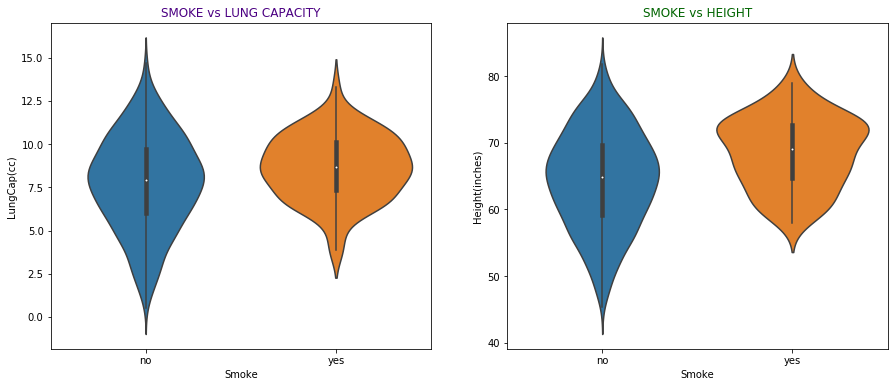

In [14]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
sns.violinplot(x='Smoke',data = lung, y='LungCap(cc)', ax=axes[0])
sns.violinplot(x='Smoke',data=lung,y='Height(inches)',ax=axes[1])
axes[0].set_title('SMOKE vs LUNG CAPACITY',color='indigo')
axes[1].set_title('SMOKE vs HEIGHT',color='darkgreen')
plt.show()


A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.It gives more information about the density estimate on the y-axis.The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin.

In the first plot,we analyize the Lungs capacity ratio in the smokers and non-smokers by their age .As u can see we have a higher probability density between 6 and 9 of luncapacity for non smokers. That is very significant because as in the Lungcapacity description, a mean value is at 7.77 . And we have a higher probability density between 7.5 and 10.5 of luncapacity for smokers. That is very significant because as in the Lungcapacity description, a mean value is at 8.64.

In the second plot,As u can see we have a higher probability density between 60 and 70 inches of height for non smokers. That is very significant because as in the Height description, a mean value is at 64.4 .And also, we have a higher probability density between 70 and 75 inches of height for smokers. That is very significant because as in the Height description, a mean value is at 68.5.

### Lung capacity vs Caesarean

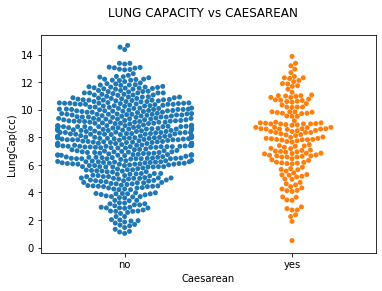

In [16]:
sns.swarmplot(y='LungCap(cc)',data=lung,x='Caesarean')
plt.suptitle('LUNG CAPACITY vs CAESAREAN')
plt.show()

In swarmplot, the points are adjusted( only along the categorical axis) so that they don't overlap. This gives a better representation of the distribution  of values, but it does not scale well to large no of obs. This style of plot is sometimes called as "BEESWARM".

In this plot, we can clearly observe that the people not born by caesarean was more and contains more lungcapacities b/w 6cc and 11cc. People born by caesarean contains more lungcapacities of 7cc and b/w 8 & 10 cc.

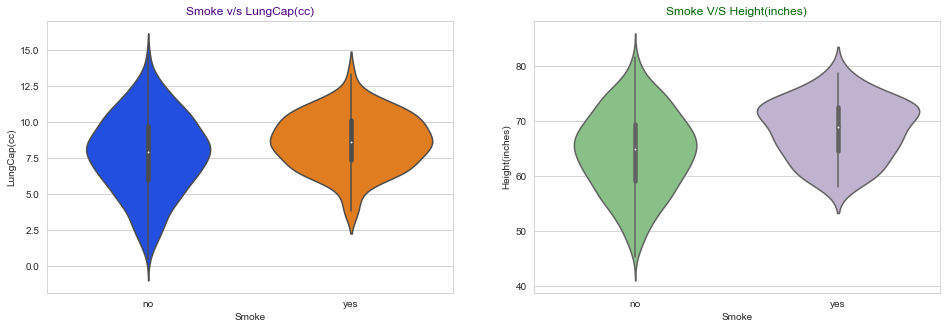

In [19]:
fig, axes = plt.subplots(1,2, figsize= (16,5))
sns.set_style("whitegrid")
sns.violinplot(y = 'LungCap(cc)',data = lung, x = 'Smoke', bw = 'scott', palette = 'bright', dodge = True, ax = axes[0])
axes[0].set_title('Smoke v/s LungCap(cc)', color = 'indigo')
sns.violinplot(y = 'Height(inches)',data = lung, x = 'Smoke', bw = 'silverman', palette = 'Accent', ax = axes[1])
axes[1].set_title('Smoke V/S Height(inches)', color = 'darkgreen')
plt.show()

A violinplot is a method of plotting numeric data. it is similar to a box plot, with the addition of a rotated kernel density plot on each side. It gives more information about the density estimate on the y-axis. the density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin.

In the first plot, we analyize the lungs capacity ratio in the smoker and non-smokers by their age. As u can see we have a higher probability density between 6 and 9 of lungcapacity for non smokers. That is very significant because as in the lungcapacity description, a mean value is at 7.77 . And  we have a higher probability density btn 7.5 and 10.5 of lungcapacity for smokers. That is very significant because as in the Lungcapacity description, a mean value is at 8.64.

In the second plot,As u can see we have a higher probability density between 60 and 70 inches of height for non smokers. That is very significant because as in the Height description, a mean value is at 64.4 .And also, we have a higher probability density between 70 and 75 inches of height for smokers. That is very significant because as in the Height description, a mean value is at 68.5.

#### Smoke vs Age , Gender vs Height

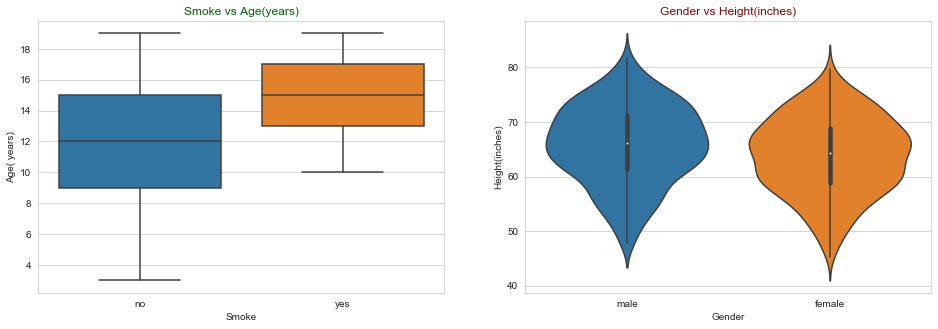

In [20]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.boxplot(x = 'Smoke', data = lung, y = 'Age( years)', ax = axes[0])
axes[0].set_title('Smoke vs Age(years)', color = 'darkgreen')
sns.violinplot(x = 'Gender', data = lung, y = 'Height(inches)', ax = axes[1])
axes[1].set_title('Gender vs Height(inches)', color = 'darkred')
plt.show()

Here Box plot was shown to represent the people who are smokers and non-smokers by their age.The first quantile is between 9 and 12, and the third quartile is between 12 and 15.The median of age of people who smokes is 12 and who don't smoke is 15. In this boxplot I see that the Non-Smokers have less age than the Smokers.

And Violin plot was shown to represent the people by their age and height(in inches).As you can see that there is high probability density between 60 and 70 inches for male and also 65 inches for female.

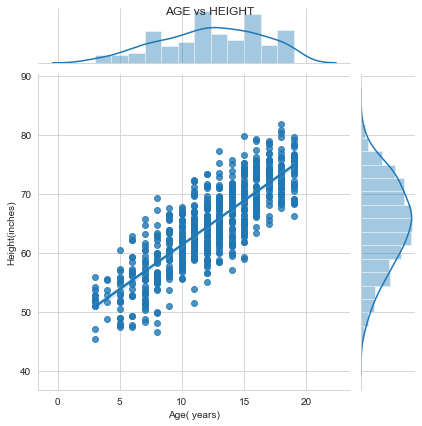

In [22]:
sns.jointplot(x='Age( years)',y='Height(inches)',data=lung,kind='reg')
plt.suptitle('AGE vs HEIGHT')
plt.show()

Joint plot can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot. Here we have regression line that best fits data points. From the plot we can observe that people of age 15-20 years has more height. Also it is true in general.

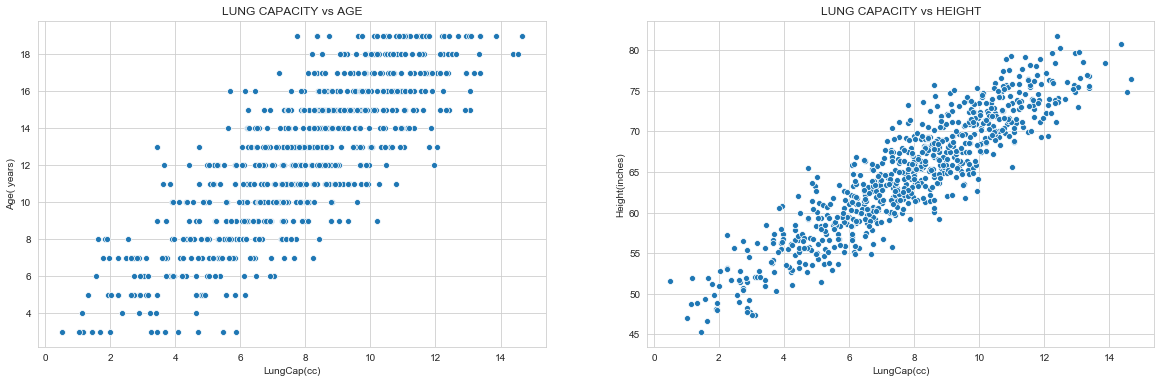

In [23]:
fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(y='Age( years)',data=lung,x='LungCap(cc)',ax=axes[0])
sns.scatterplot(x='LungCap(cc)',data=lung,y='Height(inches)',ax=axes[1])
axes[0].set_title('LUNG CAPACITY vs AGE')
axes[1].set_title('LUNG CAPACITY vs HEIGHT')
plt.show()

A scatter plot is a type of plot that shows the data as a collection of points. The position of a point depends on its two-dimensional value, where each value is a position on either the horizontal or vertical dimension.

In the first plot,scatter plot was shown to represent the lung capacities of the people by their age.Here lung closing capacity increases with age

In the second plot,scatter plot was shown to represent the lung capacities of the people by their height. Lung closing capacity increases with height.

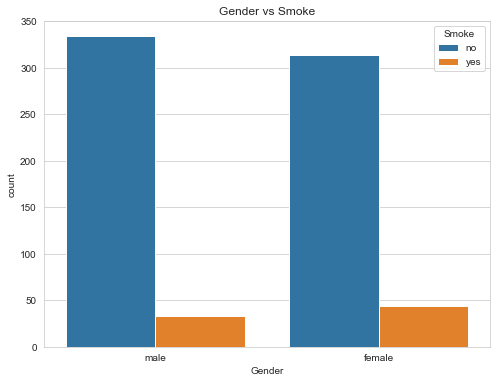

In [95]:
fig=plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=lung,hue='Smoke')
plt.title('Gender vs Smoke')
plt.show()

In the above plot, we can say that men who don't smoke are more in number when compared to non-smokers and also in the same way women who don't smoke are more than the non-smokers. We can also say that the Non-smokers are more in number than the people who smoke from a given Lung Capacity dataset.

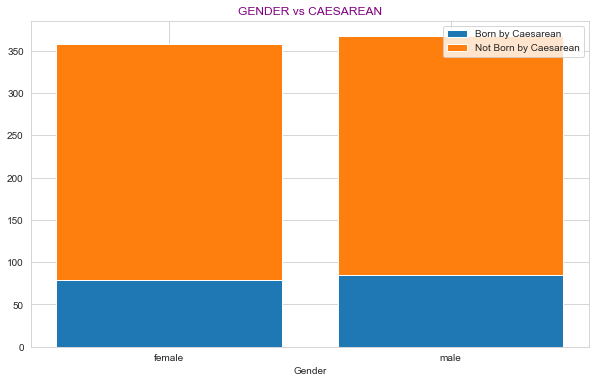

In [97]:
fig = plt.figure(figsize=(10,6))
ct = pd.crosstab(index = lung['Gender'], columns = lung['Caesarean'])
plt.bar(ct.index, ct['yes'], label = 'Born by Caesarean')
plt.bar(ct.index, ct['no'], bottom = ct['yes'], label = 'Not Born by Caesarean' )
plt.xlabel('Gender')
plt.title('GENDER vs CAESAREAN',color='purple')
plt.legend()
plt.show()

In the above chart, Men not born by caesarean are more than women not born by caesarean. It also clearly shows the type of gender born by caesarean or not.

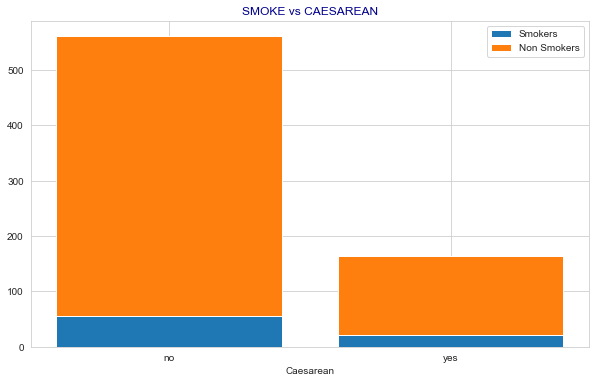

In [100]:
fig=plt.figure(figsize=(10,6))
ct=pd.crosstab(index = lung['Caesarean'],columns=lung['Smoke'])
plt.bar(ct.index,ct['yes'],label='Smokers')
plt.bar(ct.index,ct['no'],bottom=ct['yes'],label='Non Smokers')
plt.xlabel('Caesarean')
plt.title('SMOKE vs CAESAREAN',color='darkblue')
plt.legend()
plt.show()

In the above chart, Non-smokers not born by caesarean are more then the Non-smokers born by caesarean. It also clearly shows the number of people(Smokers & Non-smokers) born by caesarean or not.

## Multivariate analysis

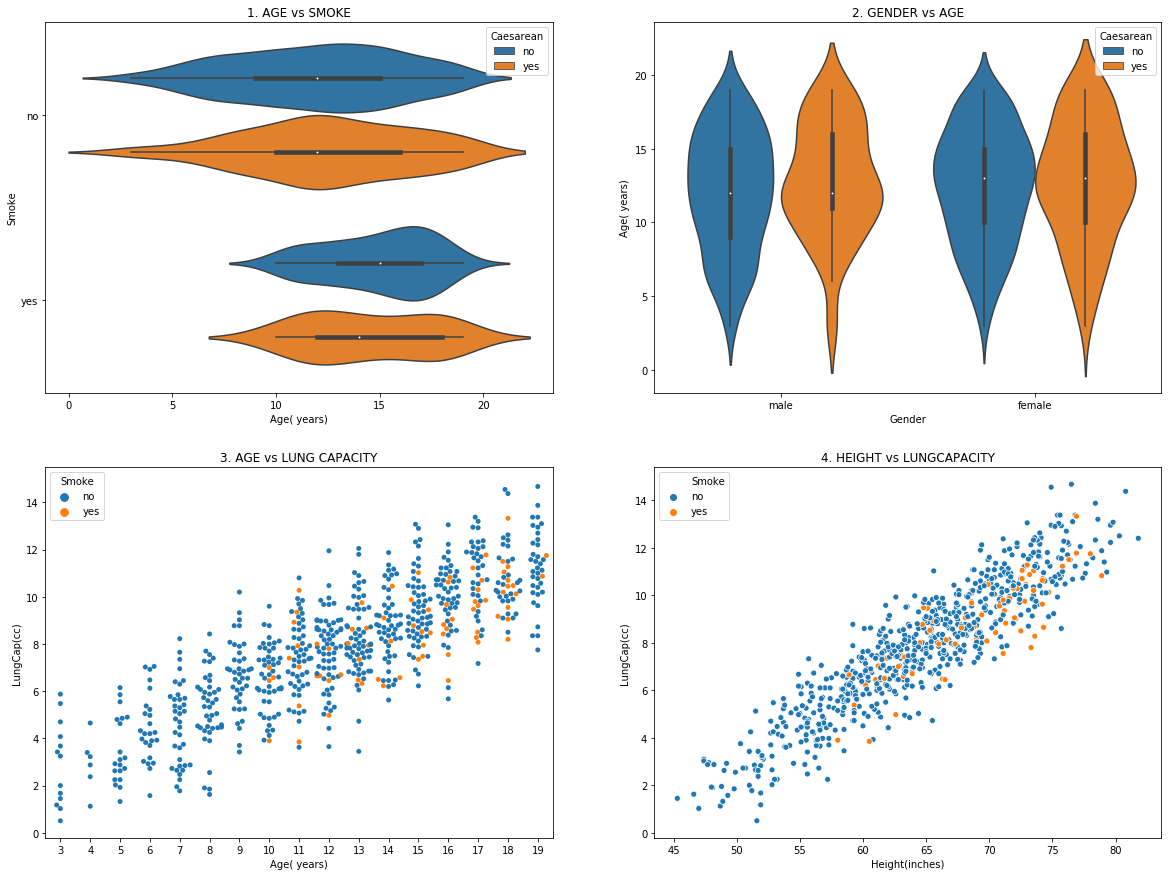

In [7]:
fig,axes=plt.subplots(2,2,figsize=(20,15))
sns.violinplot(x='Age( years)',data=lung,y='Smoke',hue='Caesarean',ax=axes[0,0])
axes[0,0].set_title('1. AGE vs SMOKE')
sns.violinplot(x='Gender',data=lung,y='Age( years)',hue='Caesarean',ax=axes[0,1])
axes[0,1].set_title('2. GENDER vs AGE')
sns.swarmplot(y='LungCap(cc)',data=lung,x='Age( years)',hue='Smoke',ax=axes[1,0])
axes[1,0].set_title('3. AGE vs LUNG CAPACITY')
sns.scatterplot(x='Height(inches)',data=lung,y='LungCap(cc)',hue='Smoke',ax=axes[1,1])
axes[1,1].set_title('4. HEIGHT vs LUNGCAPACITY')
plt.show()

In the first subplot,representation was shown about the people of age by smoke on the basis of caesarean.We can say that Non-smoker who born by caeasarean and not by caesarean are almost equal and present in all ages. People who smoke are there only in particular age(say above 6yrs) and has more probability in 10-14 years.

In the second plot,representation was shown about the gender of people by their age on the basis of Caesarean. Here We can say that men and women are almost equal differ by 2 percent. Women who born and not born by caesarean has high probability density b/w 10 and 15 years.Men who not born by caesarean has high probability density at 13,14,15 years and men who born by caesarean has high probability density at 12 years.

In the third plot,representation was shown about the age of people by their lung capacity on the basis of smoke.We can clearly observe that non smokers are more in all ages and contains more lung capacities b/w 11 & 16 years.

In the fourth plot, representation was shown about the height(in inches) of people by their lungcapacity on the basis of smoke. We can say that people having height b/w 60 & 75 inches are more and also contains lung capacities b/w 6 & 12 cc.

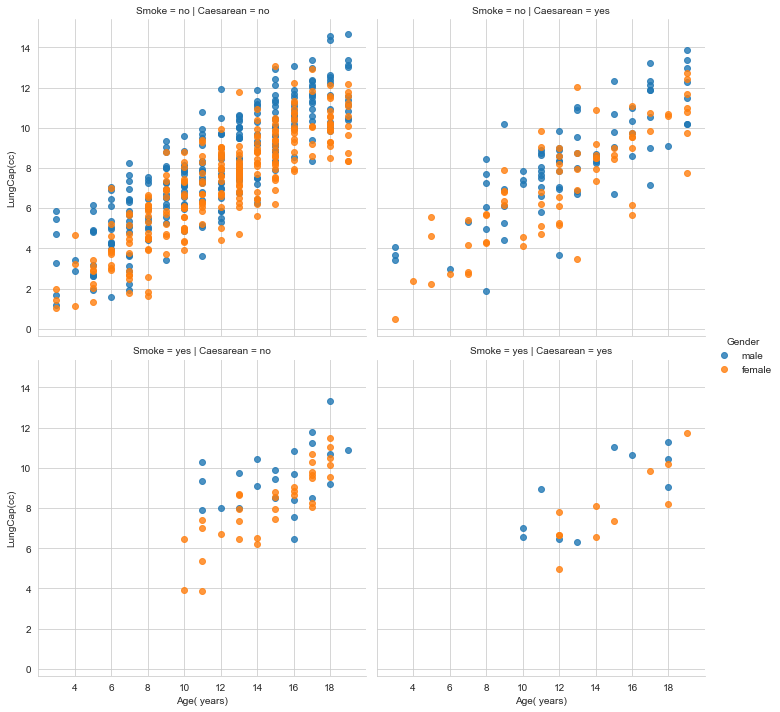

In [26]:
sns.lmplot(x='Age( years)',y='LungCap(cc)',data=lung,hue='Gender',fit_reg=False,row='Smoke',col='Caesarean')
plt.show()

LM(Linear Regression Model) plot shows many ways to explore the relationship between a pair of variables. Lmplot combines regplot with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

In this plot,representation was shown about the lung capacities of the people by their age(in years)on the basis of gender,smoking and caesarean(born by it or not).

### HeatMap

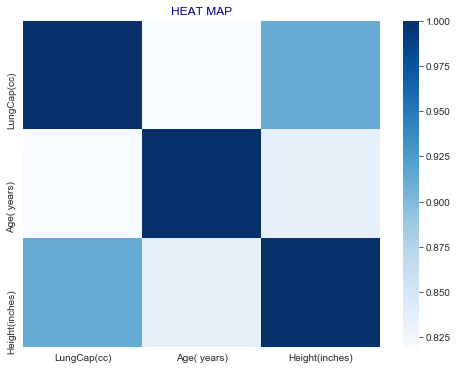

In [27]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(lung.corr(),cmap='Blues')
plt.title('HEAT MAP',color='darkblue')
plt.show()

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information.Here Heat map was plotted on the basis of correlation where only variables containing numeric values has been shown.

### Pairplot

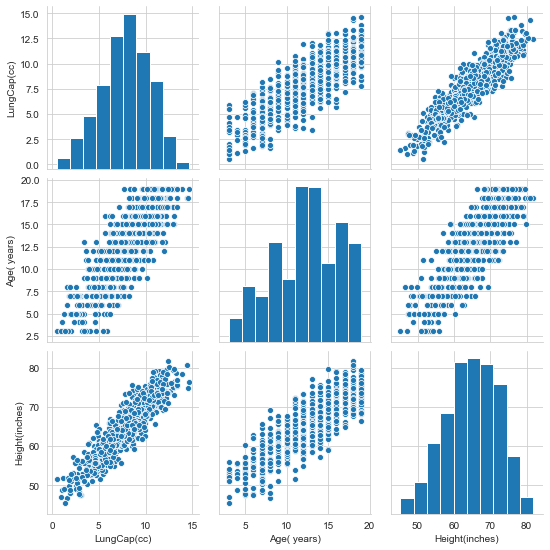

In [28]:
sns.pairplot(lung)
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plot shows the relationship (or lack thereof) between two variables. The default pairs plot by itself often gives us valuable insights. From the histograms, we learn that the height,age and lungcapacity variables are left-skewed. We see that lung capacity and age are positively correlated.

While this plot alone can be useful in an analysis, we can find make it more valuable by coloring the figures based on a categorical variable such as Smoke and Gender. All we need to do is use the '\"hue" keyword in the sns.pairplot function call.

#### Pair Plot on the basis of SMOKE

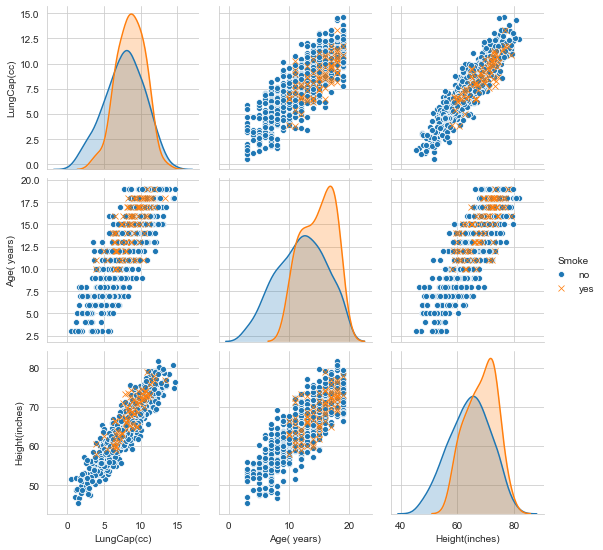

In [29]:
sns.pairplot(lung,hue='Smoke',markers=['o','x']) # for histogram use diag_kind='hist' 
plt.show()


#### Pair Plot on the basis of GENDER

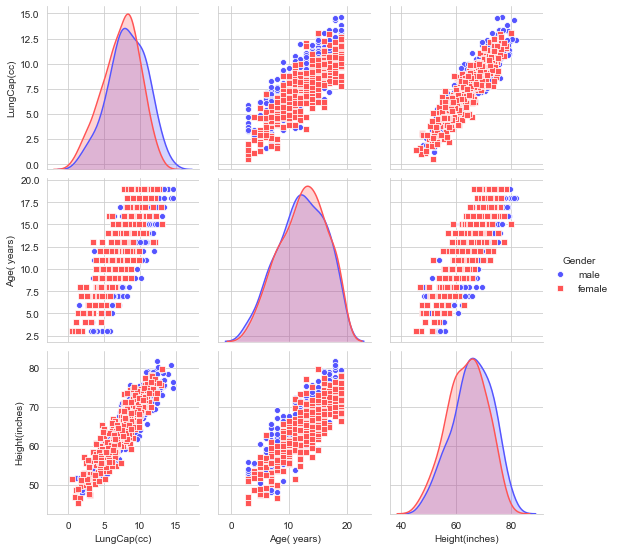

In [31]:
sns.pairplot(lung,hue='Gender',palette='seismic',markers=['o','s']) # for kde use diag_kind='kde' 
plt.show()


### Descriptive Statistics about the Dataset

Descriptive statistics summarizes the data and are broken down into measures of central tendency (mean, median, and mode) and measures of dispersion (standard deviation, minimum/maximum values, range,IQR) and measures to describe shape of distribution (kurtosis, and skewness).

In [32]:
#measures of central tendency
lung.mean() 

LungCap(cc)        7.863148
Age( years)       12.326897
Height(inches)    64.836276
dtype: float64

In [33]:
lung.median()

LungCap(cc)        8.0
Age( years)       13.0
Height(inches)    65.4
dtype: float64

In [34]:
lung.mode()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,8.35,13,65.4,no,male,no


In [35]:
#measures of dispersion
lung.min()

LungCap(cc)        0.507
Age( years)            3
Height(inches)      45.3
Smoke                 no
Gender            female
Caesarean             no
dtype: object

In [36]:
lung.max()

LungCap(cc)       14.675
Age( years)           19
Height(inches)      81.8
Smoke                yes
Gender              male
Caesarean            yes
dtype: object

In [37]:
lung.describe()

,LungCap(cc),Age( years),Height(inches)
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


### Conclusion

With the help of statistical analysis and graphical representations, I can easily analysize the Lungs closing capacity ratio in the smokers and non-smokers by their age, gender and height.